# zomato data analysis project 

In [2]:
# importing libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read file of data 

df= pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [8]:
# data cleaning 

# convert the data type of rate 

def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


###### observation - dont have any null value  

Text(0.5, 0, 'type of resturant')

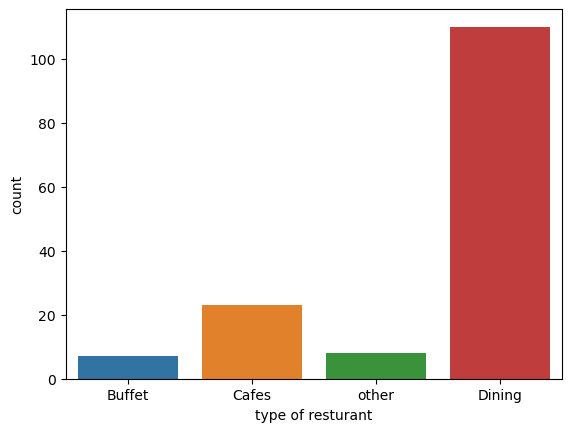

In [11]:
# type of resturant 


sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")

###### observation - majority customer order food from dining resturant 

In [13]:
# count of vote for the  each type of resturant 

group_data=df.groupby('listed_in(type)')['votes'].sum()
group_data


listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0, 0.5, 'votes')

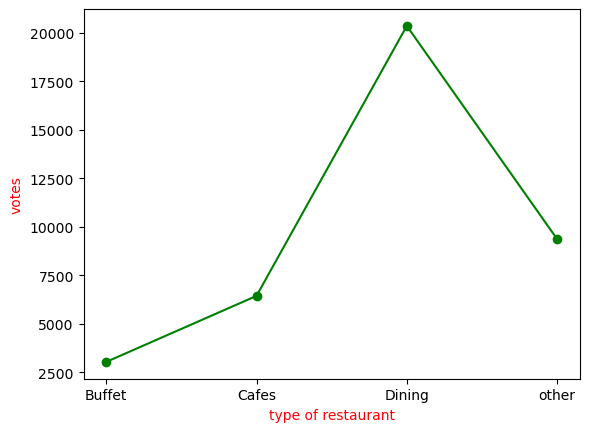

In [24]:
result = pd.DataFrame({'votes': group_data})
plt.plot(result,c="green", marker="o")
plt.xlabel("type of restaurant",c="red",size=10)
plt.ylabel("votes",c="red",size=10)

###### observation -customer gives the highest vote to dining type restaurant

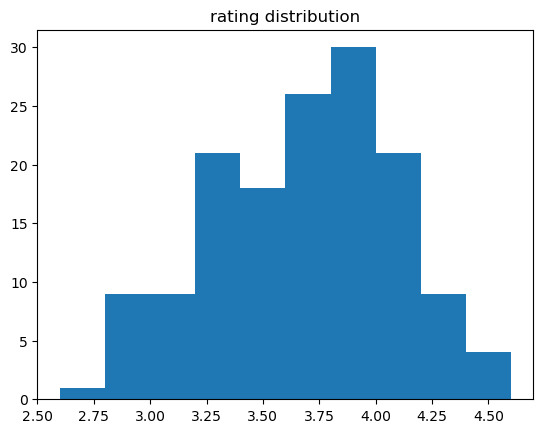

In [26]:
# majority rating between range?

plt.hist(df['rate'],bins=10)
plt.title("rating distribution")
plt.show()

###### observation - majority restaurant recieve from 3.5-4.00

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

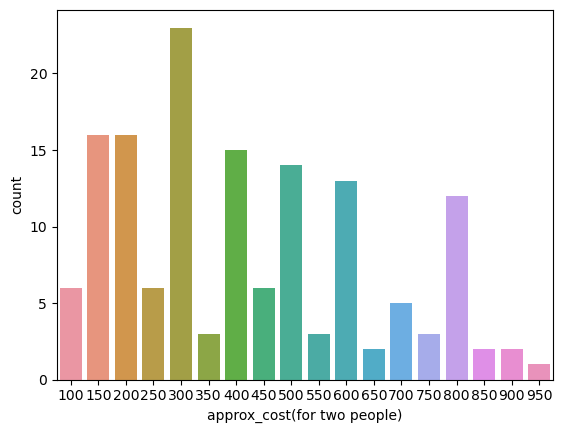

In [30]:
# avg order spending by couple 

couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)


###### observation - majority of couples prefer restaurants with an approx cost of 300 rs

<Axes: xlabel='online_order', ylabel='rate'>

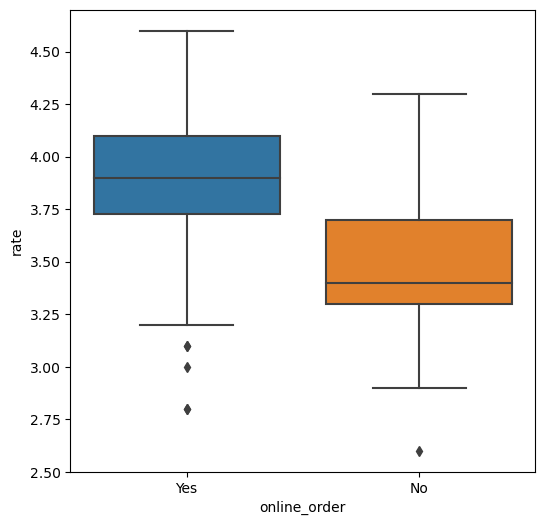

In [32]:
# which mode receive max rating 

plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y = 'rate', data=df)

###### observation - online order recieved more rating compare to offline

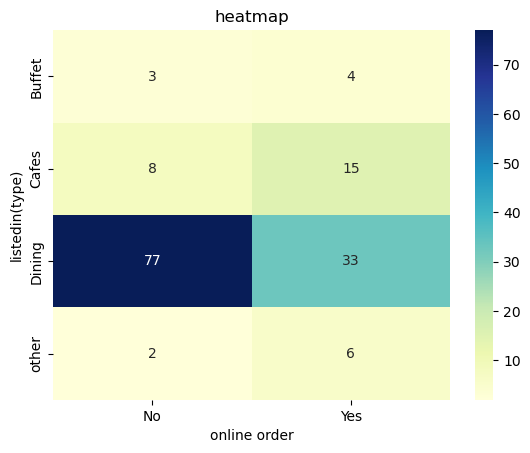

In [45]:
# ##

pivot_table=df.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title('heatmap')
plt.xlabel("online order")
plt.ylabel("listedin(type)")
plt.show()

###### observtaion - dining restaurant primarily accept offline orders,
###### - cafed primarily receive online orders.
##### this suggest that client prefered to  orders in person at resturants, but prefer online order at cafes 
    